## Main Goal
Building a Music Recommendaton System!  

A Music Recommendation System is an application of Data Science that aims to assist users in discovering new and relevant musical content based on their preferences and listening behaviour.
### Data Understanding
## Main Objective
The goal is to create a recommendation system that can suggest relevant songs to user based on their musical interest, known and liked songs, or general preferences.

### Data Understanding

|variable                 |class     |description |
|:---|:---|:-----------|
|track_id                 |character | Song unique ID|
|track_name               |character | Song Name|
|track_artist             |character | Song Artist|
|track_popularity         |double    | Song Popularity (0-100) where higher is better |
|track_album_id           |character | Album unique ID|
|track_album_name         |character | Song album name |
|track_album_release_date |character | Date when album released |
|playlist_name            |character | Name of playlist |
|playlist_id              |character | Playlist ID|
|playlist_genre           |character | Playlist genre |
|playlist_subgenre        |character | Playlist subgenre|
|danceability             |double    | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
|energy                   |double    | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
|key                      |double    | The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. |
|loudness                 |double    | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|mode                     |double    | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|speechiness              |double    | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. |
|acousticness             |double    | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|instrumentalness         |double    | Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
|liveness                 |double    | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
|valence                  |double    | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
|tempo                    |double    | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
|duration_ms              |double    | Duration of song in milliseconds |

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("datasets/spotify_songs.csv")

In [3]:
dataset.head(2)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.00000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.00421,0.3570,0.693,99.972,162600


In [4]:
dataset.shape

(32833, 23)

In [5]:
dataset.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [7]:
# Drop rows with null values in specific columns
dataset = dataset.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

# Verify that the null values are removed
print(dataset.isnull().sum())

track_id                    0
track_name                  0
track_artist                0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [10]:
dataset.isna().any()

track_id                    False
track_name                  False
track_artist                False
track_popularity            False
track_album_id              False
track_album_name            False
track_album_release_date    False
playlist_name               False
playlist_id                 False
playlist_genre              False
playlist_subgenre           False
danceability                False
energy                      False
key                         False
loudness                    False
mode                        False
speechiness                 False
acousticness                False
instrumentalness            False
liveness                    False
valence                     False
tempo                       False
duration_ms                 False
dtype: bool

### Basic EDA on the dataset

#### What is the distribution of track_popularity across different genres and subgenres?
(This helps in understanding which genres generally contain more popular songs and how the popularity is distributed across different genres.)

In [12]:
# Group by playlist_genre and calculate the mean track_popularity
genre_popularity = dataset.groupby('playlist_genre')['track_popularity'].mean().reset_index()

# Get the top 10 genres by track_popularity
top_genres = genre_popularity.nlargest(10, 'track_popularity')

print(top_genres)

  playlist_genre  track_popularity
2            pop         47.744870
1          latin         47.044828
4            rap         43.238029
5           rock         41.728338
3            r&b         41.223532
0            edm         34.833526


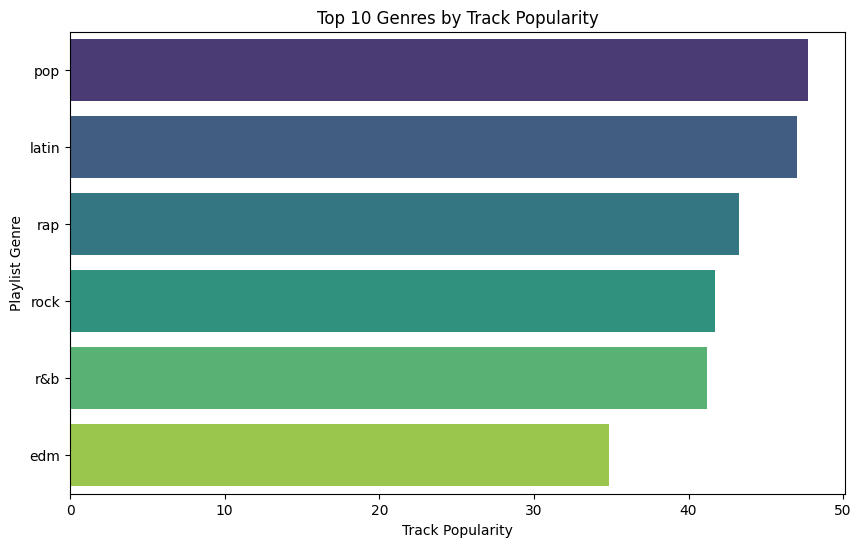

In [15]:
# Plot the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(data=top_genres, x='track_popularity', y='playlist_genre', hue=top_genres['playlist_genre'], palette='viridis')
plt.title('Top 10 Genres by Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Playlist Genre')
plt.show()

> 'Pop', 'Latin', 'Rap' are top 3 genres tend to have more popular tracks on average!  

In [19]:
# Group by playlist_subgenre and calculate the mean track_popularity within each genre
subgenre_popularity = dataset.groupby(['playlist_genre', 'playlist_subgenre'])['track_popularity'].mean().reset_index()

In [31]:
# Plot top 3 subgenres within each of the top genres
for genre in top_genres['playlist_genre']:
    genre_subgenres = subgenre_popularity[subgenre_popularity['playlist_genre'] == genre]
    top_subgenres = genre_subgenres.nlargest(3, 'track_popularity')

    print("Genre:", genre)
    print("Top 3 Subgenres are:")
    print(top_subgenres[['playlist_subgenre', 'track_popularity']])
    print("--------------------------------------")

Genre: pop
Top 3 Subgenres are:
   playlist_subgenre  track_popularity
11     post-teen pop         56.825509
8          dance pop         52.079353
9         electropop         42.725142
--------------------------------------
Genre: latin
Top 3 Subgenres are:
  playlist_subgenre  track_popularity
6         reggaeton         52.925105
5         latin pop         51.099842
4     latin hip hop         43.477341
--------------------------------------
Genre: rap
Top 3 Subgenres are:
   playlist_subgenre  track_popularity
17           hip hop         53.773071
19              trap         50.308288
18  southern hip hop         36.467742
--------------------------------------
Genre: rock
Top 3 Subgenres are:
   playlist_subgenre  track_popularity
23    permanent wave         54.000905
21      classic rock         40.809414
20        album rock         38.322066
--------------------------------------
Genre: r&b
Top 3 Subgenres are:
     playlist_subgenre  track_popularity
12             hip p

> The top 3 subgenres within each genre based on track_popularity.  
Example: The top 3 subgenres in Pop genre by track_popularity are: Post-Teen Pop, Dance Pop, Electro Pop